In [1]:
import names
import nltk

In [11]:
from nltk.corpus import names

nltk.download('names')

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\cecil\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\names.zip.


True

In [16]:


names.fileids()


['female.txt', 'male.txt']

In [22]:
namelist = ([(name, 'male') for name in names.words('male.txt')] + [(name, 'female') for name in names.words('female.txt')])

namelist

[('Aamir', 'male'),
 ('Aaron', 'male'),
 ('Abbey', 'male'),
 ('Abbie', 'male'),
 ('Abbot', 'male'),
 ('Abbott', 'male'),
 ('Abby', 'male'),
 ('Abdel', 'male'),
 ('Abdul', 'male'),
 ('Abdulkarim', 'male'),
 ('Abdullah', 'male'),
 ('Abe', 'male'),
 ('Abel', 'male'),
 ('Abelard', 'male'),
 ('Abner', 'male'),
 ('Abraham', 'male'),
 ('Abram', 'male'),
 ('Ace', 'male'),
 ('Adair', 'male'),
 ('Adam', 'male'),
 ('Adams', 'male'),
 ('Addie', 'male'),
 ('Adger', 'male'),
 ('Aditya', 'male'),
 ('Adlai', 'male'),
 ('Adnan', 'male'),
 ('Adolf', 'male'),
 ('Adolfo', 'male'),
 ('Adolph', 'male'),
 ('Adolphe', 'male'),
 ('Adolpho', 'male'),
 ('Adolphus', 'male'),
 ('Adrian', 'male'),
 ('Adrick', 'male'),
 ('Adrien', 'male'),
 ('Agamemnon', 'male'),
 ('Aguinaldo', 'male'),
 ('Aguste', 'male'),
 ('Agustin', 'male'),
 ('Aharon', 'male'),
 ('Ahmad', 'male'),
 ('Ahmed', 'male'),
 ('Ahmet', 'male'),
 ('Ajai', 'male'),
 ('Ajay', 'male'),
 ('Al', 'male'),
 ('Alaa', 'male'),
 ('Alain', 'male'),
 ('Alan', 'male

# Work with the movies start from here

In [1]:
import scraping_class
logfile = 'log.csv'## name your log file.
connector = scraping_class.Connector(logfile)

In [2]:
#Defining url, the call and parsing
from bs4 import BeautifulSoup
import requests
url = 'https://www.imdb.com/search/keyword/?ref_=kw_ref_typ&sort=moviemeter%2Casc&mode=detail&page=1&title_type=movie&fbclid=IwAR3AAeVD_whYi1AwPsSGdYsgH8FnupVrBhImRFD__GL3wdHegJwcxrUsfyc'
response,callid = connector.get(url,'Exam')
html = response.text
soup = BeautifulSoup(html,'lxml')

#Here we define what node we are looking at
h3_node = soup.find('h3') # find table node with specific attribute

h3_node





<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt7131622/">Once Upon a Time... in Hollywood</a>
<span class="lister-item-year text-muted unbold">(2019)</span>
</h3>

In [4]:
#This is used to extract the names of the movies

headline = soup.find('h3') # search for the first headline: h1 tag. 
name = headline['class'][0].strip() # use the class attribute name as column name.
value = headline.text.strip() # extract text using build in method.
#print(name,':',value)
value.split('\n')[1]

'Once Upon a Time... in Hollywood'

In [5]:
# Loop it through 
movielist= []

for v in range(1, 201):
    #url1 = 'https://www.imdb.com/search/keyword/?ref_=kw_ref_typ&sort=moviemeter%2Casc&mode=detail&page={}&title_type=movie&fbclid=IwAR3AAeVD_whYi1AwPsSGdYsgH8FnupVrBhImRFD__GL3wdHegJwcxrUsfyc'.format(v)
    url1='https://www.imdb.com/search/keyword/?ref_=kw_ref_yr&mode=detail&page={}&title_type=movie&fbclid=IwAR0C3gLbCWwGXwmc9cCYVAGGB80tDhHXJ4YiLKKB1kg4stg1dYizjyCpC-U&release_date=1980%2C2019&sort=num_votes%2Cdesc'.format(v)
    call = 'Exam, KU{}'.format(v)
    response,callid = connector.get(url1, call)
    html = response.text
    soup = BeautifulSoup(html,'lxml')
    
    for i in range(50):
        headline_i = soup.findAll('h3')[i] # search for the first headline: h1 tag. 
        #name = headline_i['class'][0].strip() # use the class attribute name as column name.
        value = headline_i.text.strip() # extract text using build in method.
        film = value.split('\n')[1]
        movielist.append(film)
    
movielist

['En verden udenfor',
 'The Dark Knight',
 'Inception',
 'Fight Club',
 'Pulp Fiction',
 'Forrest Gump',
 'The Matrix',
 'Ringenes herre: Eventyret om ringen',
 'Ringenes herre: Kongen vender tilbage',
 'The Dark Knight Rises',
 'Ringenes herre: De to tårne',
 'Interstellar',
 'Seven',
 'Django Unchained',
 'Gladiator',
 'Batman Begins',
 'The Avengers',
 'Ondskabens øjne',
 'Inglourious Basterds',
 'Saving Private Ryan',
 'Schindlers liste',
 'The Departed',
 'The Prestige',
 'Imperiet slår igen',
 'Avatar',
 'The Wolf of Wall Street',
 'Memento',
 'Den grønne mil',
 'Shutter Island',
 'American Beauty',
 'Pirates of the Caribbean: Den sorte forbandelse',
 'Titanic',
 'Guardians of the Galaxy',
 'American History X',
 'V for Vendetta',
 'Tilbage til fremtiden',
 'Leon',
 'Terminator 2: Dommedag',
 'Goodfellas',
 'Kill Bill: Vol. 1',
 'WALL·E',
 'The Usual Suspects',
 'Braveheart',
 'Find Nemo',
 'Iron Man',
 'Jedi-ridderen vender tilbage',
 'Op',
 'The Lion King',
 'Den sjette sans',


In [ ]:
len(movielist)

In [5]:
#Extract the year (WORKS)
#Look at the years for the movies and plot them

year_list= []

for v in range(1, 201):
    #url1 = 'https://www.imdb.com/search/keyword/?ref_=kw_nxt&mode=detail&page={}&title_type=movie&fbclid=IwAR3AAeVD_whYi1AwPsSGdYsgH8FnupVrBhImRFD__GL3wdHegJwcxrUsfyc&sort=num_votes,desc'.format{v}
    url1 = 'https://www.imdb.com/search/keyword/?ref_=kw_nxt&mode=detail&page={}&title_type=movie&fbclid=IwAR3AAeVD_whYi1AwPsSGdYsgH8FnupVrBhImRFD__GL3wdHegJwcxrUsfyc&sort=num_votes,desc'.format(v)
    call = 'Exam, KU{}'.format(v)
    response,callid = connector.get(url1, call)
    html = response.text
    soup = BeautifulSoup(html,'lxml')
    
    for i in range(50):
        headline_i = soup.findAll('h3')[i] # search for the first headline: h1 tag. 
        #name = headline_i['class'][0].strip() # use the class attribute name as column name.
        value = headline_i.text.strip() # extract text using build in method        
        film = value.split('\n')[2]
        if len(film)> 6:
            film = value.split(' ')[-1]
        year_list.append(film)


len(year_list)

year_list



['(1994)',
 '(2008)',
 '(2010)',
 '(1999)',
 '(1994)',
 '(1994)',
 '(1999)',
 '(2001)',
 '(2003)',
 '(1972)',
 '(2012)',
 '(2002)',
 '(2014)',
 '(1995)',
 '(2012)',
 '(2000)',
 '(2005)',
 '(2012)',
 '(1991)',
 '(2009)',
 '(1977)',
 '(1998)',
 '(1993)',
 '(2006)',
 '(2006)',
 '(1980)',
 '(2009)',
 '(2013)',
 '(2000)',
 '(1999)',
 '(2010)',
 '(1974)',
 '(1999)',
 '(2003)',
 '(1997)',
 '(2014)',
 '(1998)',
 '(2005)',
 '(1985)',
 '(1994)',
 '(1991)',
 '(2003)',
 '(1990)',
 '(2008)',
 '(1995)',
 '(1995)',
 '(2003)',
 '(2008)',
 '(1983)',
 '(2009)',
 '(1994)',
 '(1999)',
 '(1998)',
 '(1975)',
 '(1992)',
 '(2004)',
 '(2016)',
 '(1981)',
 '(1995)',
 '(2012)',
 '(1980)',
 '(1993)',
 '(2015)',
 '(2015)',
 '(2001)',
 '(1997)',
 '(2007)',
 '(2014)',
 '(2008)',
 '(2001)',
 '(1984)',
 '(2002)',
 '(1988)',
 '(2000)',
 '(2012)',
 '(1979)',
 '(2005)',
 '(2013)',
 '(2000)',
 '(2001)',
 '(2013)',
 '(2018)',
 '(2011)',
 '(1971)',
 '(2006)',
 '(2010)',
 '(2011)',
 '(2015)',
 '(2011)',
 '(2011)',
 '(2015)',

In [6]:
year_list[1][1:5]

'2008'

In [7]:
import seaborn as sns
import pandas as pd

year_listny = []

for i in range(10000):
    ny= year_list[i][1:5]
    year_listny.append(ny)

year_listny


['1994',
 '2008',
 '2010',
 '1999',
 '1994',
 '1994',
 '1999',
 '2001',
 '2003',
 '1972',
 '2012',
 '2002',
 '2014',
 '1995',
 '2012',
 '2000',
 '2005',
 '2012',
 '1991',
 '2009',
 '1977',
 '1998',
 '1993',
 '2006',
 '2006',
 '1980',
 '2009',
 '2013',
 '2000',
 '1999',
 '2010',
 '1974',
 '1999',
 '2003',
 '1997',
 '2014',
 '1998',
 '2005',
 '1985',
 '1994',
 '1991',
 '2003',
 '1990',
 '2008',
 '1995',
 '1995',
 '2003',
 '2008',
 '1983',
 '2009',
 '1994',
 '1999',
 '1998',
 '1975',
 '1992',
 '2004',
 '2016',
 '1981',
 '1995',
 '2012',
 '1980',
 '1993',
 '2015',
 '2015',
 '2001',
 '1997',
 '2007',
 '2014',
 '2008',
 '2001',
 '1984',
 '2002',
 '1988',
 '2000',
 '2012',
 '1979',
 '2005',
 '2013',
 '2000',
 '2001',
 '2013',
 '2018',
 '2011',
 '1971',
 '2006',
 '2010',
 '2011',
 '2015',
 '2011',
 '2011',
 '2015',
 '2014',
 '2009',
 '2008',
 '1983',
 '1998',
 '2010',
 '1999',
 '2001',
 '2010',
 '2002',
 '2013',
 '2002',
 '2002',
 '2005',
 '1976',
 '1989',
 '2014',
 '2007',
 '1982',
 '1966',
 

In [188]:
#Extrating the stars (not working)

stars_list= []

for v in range(1, 2):
    url1 = 'https://www.imdb.com/search/keyword/?ref_=kw_ref_typ&sort=moviemeter%2Casc&mode=detail&page={}&title_type=movie&fbclid=IwAR3AAeVD_whYi1AwPsSGdYsgH8FnupVrBhImRFD__GL3wdHegJwcxrUsfyc'.format(v)
    call = 'Exam, KU{}'.format(v)
    response,callid = connector.get(url1, call)
    html = response.text
    soup = BeautifulSoup(html,'lxml')
    
    for i in range(1,50):
        headline_i = soup.findAll('p', {'class':'test-muted text-small'})[i] # search for the first headline: h1 tag. 
        #name = headline_i['class'][0].strip() # use the class attribute name as column name.
        value = headline_i.text.strip() # extract text using build in method        
        film = value.split('\n')
        stars_list.append(film)

        

stars_list

IndexError: list index out of range

In [8]:
import re

year_list=[]

for i in range(50):
    headline_i = soup.findAll('h3')[1] # search for the first headline: h1 tag. 
    value = headline_i.text.strip() # extract text using build in method        
    film = value.split('\n')
    film1 = value.split(' ')[-1]
    year_list.append(film1)

year_list


['9,952.\nPandemic\n(2016)',
 '9,952.\nPandemic\n(2016)',
 '9,952.\nPandemic\n(2016)',
 '9,952.\nPandemic\n(2016)',
 '9,952.\nPandemic\n(2016)',
 '9,952.\nPandemic\n(2016)',
 '9,952.\nPandemic\n(2016)',
 '9,952.\nPandemic\n(2016)',
 '9,952.\nPandemic\n(2016)',
 '9,952.\nPandemic\n(2016)',
 '9,952.\nPandemic\n(2016)',
 '9,952.\nPandemic\n(2016)',
 '9,952.\nPandemic\n(2016)',
 '9,952.\nPandemic\n(2016)',
 '9,952.\nPandemic\n(2016)',
 '9,952.\nPandemic\n(2016)',
 '9,952.\nPandemic\n(2016)',
 '9,952.\nPandemic\n(2016)',
 '9,952.\nPandemic\n(2016)',
 '9,952.\nPandemic\n(2016)',
 '9,952.\nPandemic\n(2016)',
 '9,952.\nPandemic\n(2016)',
 '9,952.\nPandemic\n(2016)',
 '9,952.\nPandemic\n(2016)',
 '9,952.\nPandemic\n(2016)',
 '9,952.\nPandemic\n(2016)',
 '9,952.\nPandemic\n(2016)',
 '9,952.\nPandemic\n(2016)',
 '9,952.\nPandemic\n(2016)',
 '9,952.\nPandemic\n(2016)',
 '9,952.\nPandemic\n(2016)',
 '9,952.\nPandemic\n(2016)',
 '9,952.\nPandemic\n(2016)',
 '9,952.\nPandemic\n(2016)',
 '9,952.\nPand

In [11]:
year_listny = []

for i in range(10000):
    ny = year_list[i][1:5]
    year_listny.append(ny)
    
year_listny

IndexError: list index out of range

In [8]:
years = list(map(int, year_listny))

years

[1994,
 2008,
 2010,
 1999,
 1994,
 1994,
 1999,
 2001,
 2003,
 1972,
 2012,
 2002,
 2014,
 1995,
 2012,
 2000,
 2005,
 2012,
 1991,
 2009,
 1977,
 1998,
 1993,
 2006,
 2006,
 1980,
 2009,
 2013,
 2000,
 1999,
 2010,
 1974,
 1999,
 2003,
 1997,
 2014,
 1998,
 2005,
 1985,
 1994,
 1991,
 2003,
 1990,
 2008,
 1995,
 1995,
 2003,
 2008,
 1983,
 2009,
 1994,
 1999,
 1998,
 1975,
 1992,
 2004,
 2016,
 1981,
 1995,
 2012,
 1980,
 1993,
 2015,
 2015,
 2001,
 1997,
 2007,
 2014,
 2008,
 2001,
 1984,
 2002,
 1988,
 2000,
 2012,
 1979,
 2005,
 2013,
 2000,
 2001,
 2013,
 2018,
 2011,
 1971,
 2006,
 2010,
 2011,
 2015,
 2011,
 2011,
 2015,
 2014,
 2009,
 2008,
 1983,
 1998,
 2010,
 1999,
 2001,
 2010,
 2002,
 2013,
 2002,
 2002,
 2005,
 1976,
 1989,
 2014,
 2007,
 1982,
 1966,
 2015,
 2014,
 2014,
 2014,
 2004,
 2012,
 2010,
 2006,
 1987,
 2011,
 2004,
 2009,
 1986,
 1957,
 2010,
 2016,
 2012,
 1996,
 2004,
 2007,
 2013,
 2016,
 2007,
 2002,
 2013,
 2006,
 2001,
 2010,
 2017,
 2007,
 2013,
 2001,

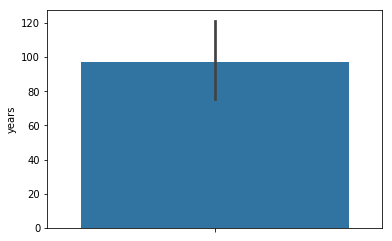

In [58]:
sns.barplot( y='years', data=taelny)

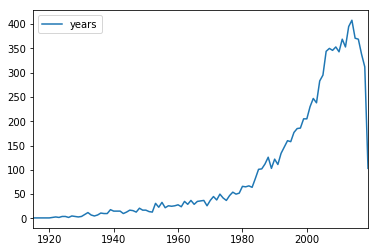

In [9]:
import seaborn as sns
import pandas as pd

years_pd = pd.DataFrame(years)


years_pd['count'] = 1

years_pd['years'] = years_pd[0]

#years_pd.groupby('years').value_counts()

tael = years_pd['years'].value_counts()

#res = df['YearMonth'].value_counts()
taelny = pd.DataFrame(tael)
#sns.barplot(x='years', data=tael)

taelny.sort_index().plot()

taels = taelny.sort_index()

C:\Users\cecil\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


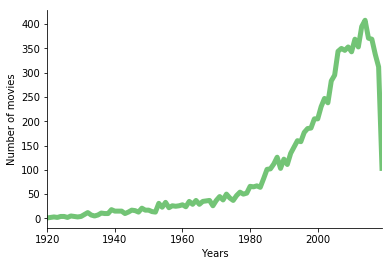

In [21]:
import matplotlib
import matplotlib.pyplot as plt

# Plot for the years 1920 - 2019
#fig1 = plt.plot(taels, palette='Greens')
fig1=sns.lineplot(data=taels, palette='Greens', legend = None, linewidth=5)
plt.xlabel('Years')
plt.ylabel('Number of movies')
axes = plt.axes()
axes.set_xlim([1920, 2019])
sns.despine(left=False, right=True, bottom=False)
plt.savefig('xfig1.png')

C:\Users\cecil\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


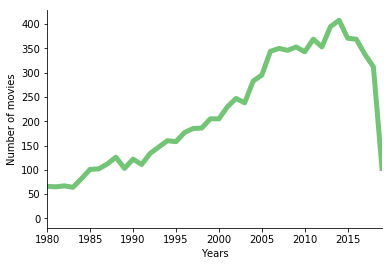

In [19]:
# Plot for the years 1980 - 2019
fig2 = sns.lineplot(data=taels, palette='Greens', legend = None, linewidth=5)
plt.xlabel('Years')
plt.ylabel('Number of movies')
axes = plt.axes()
axes.set_xlim([1980, 2019])
sns.despine(left=False, right=True, bottom=False)
plt.savefig('xfig2.png')

In [73]:
# Movies in the period from 1980 - 2019

#urlnew = 'https://www.imdb.com/search/keyword/?ref_=kw_ref_yr&mode=detail&page=1&title_type=movie&fbclid=IwAR3AAeVD_whYi1AwPsSGdYsgH8FnupVrBhImRFD__GL3wdHegJwcxrUsfyc&sort=num_votes,desc&release_date=1980%2C2019'

year_list_modern= []

for v in range(1, 201):
    url1 = 'https://www.imdb.com/search/keyword/?ref_=kw_ref_yr&mode=detail&page={}&title_type=movie&fbclid=IwAR3AAeVD_whYi1AwPsSGdYsgH8FnupVrBhImRFD__GL3wdHegJwcxrUsfyc&sort=num_votes,desc&release_date=1980%2C2019'.format(v)
    call = 'Exam, KU{}'.format(v)
    response,callid = connector.get(url1, call)
    html = response.text
    soup = BeautifulSoup(html,'lxml')
    
    for i in range(50):
        headline_i = soup.findAll('h3')[i] # search for the first headline: h1 tag. 
        #name = headline_i['class'][0].strip() # use the class attribute name as column name.
        value = headline_i.text.strip() # extract text using build in method        
        film = value.split('\n')[2]
        if len(film)> 6:
            film = value.split(' ')[-1]
        year_list_modern.append(film)


len(year_list_modern)

year_list_modern


['(1994)',
 '(2008)',
 '(2010)',
 '(1999)',
 '(1994)',
 '(1994)',
 '(1999)',
 '(2001)',
 '(2003)',
 '(2012)',
 '(2002)',
 '(2014)',
 '(1995)',
 '(2012)',
 '(2000)',
 '(2005)',
 '(2012)',
 '(1991)',
 '(2009)',
 '(1998)',
 '(1993)',
 '(2006)',
 '(2006)',
 '(1980)',
 '(2009)',
 '(2013)',
 '(2000)',
 '(1999)',
 '(2010)',
 '(1999)',
 '(2003)',
 '(1997)',
 '(2014)',
 '(1998)',
 '(2005)',
 '(1985)',
 '(1994)',
 '(1991)',
 '(1990)',
 '(2008)',
 '(2003)',
 '(1995)',
 '(1995)',
 '(2003)',
 '(2008)',
 '(1983)',
 '(2009)',
 '(1994)',
 '(1999)',
 '(1998)',
 '(1992)',
 '(2004)',
 '(2016)',
 '(1981)',
 '(1995)',
 '(2012)',
 '(1980)',
 '(1993)',
 '(2015)',
 '(2015)',
 '(2001)',
 '(1997)',
 '(2007)',
 '(2014)',
 '(2008)',
 '(2001)',
 '(1984)',
 '(2002)',
 '(1988)',
 '(2000)',
 '(2012)',
 '(2005)',
 '(2013)',
 '(2000)',
 '(2001)',
 '(2013)',
 '(2011)',
 '(2018)',
 '(2006)',
 '(2010)',
 '(2011)',
 '(2015)',
 '(2011)',
 '(2011)',
 '(2015)',
 '(2014)',
 '(2009)',
 '(2008)',
 '(1983)',
 '(1998)',
 '(2010)',

In [74]:
year_listny_modern = []

for i in range(10000):
    ny = year_list_modern[i][1:5]
    year_listny_modern.append(ny)
    
year_listny_modern

['1994',
 '2008',
 '2010',
 '1999',
 '1994',
 '1994',
 '1999',
 '2001',
 '2003',
 '2012',
 '2002',
 '2014',
 '1995',
 '2012',
 '2000',
 '2005',
 '2012',
 '1991',
 '2009',
 '1998',
 '1993',
 '2006',
 '2006',
 '1980',
 '2009',
 '2013',
 '2000',
 '1999',
 '2010',
 '1999',
 '2003',
 '1997',
 '2014',
 '1998',
 '2005',
 '1985',
 '1994',
 '1991',
 '1990',
 '2008',
 '2003',
 '1995',
 '1995',
 '2003',
 '2008',
 '1983',
 '2009',
 '1994',
 '1999',
 '1998',
 '1992',
 '2004',
 '2016',
 '1981',
 '1995',
 '2012',
 '1980',
 '1993',
 '2015',
 '2015',
 '2001',
 '1997',
 '2007',
 '2014',
 '2008',
 '2001',
 '1984',
 '2002',
 '1988',
 '2000',
 '2012',
 '2005',
 '2013',
 '2000',
 '2001',
 '2013',
 '2011',
 '2018',
 '2006',
 '2010',
 '2011',
 '2015',
 '2011',
 '2011',
 '2015',
 '2014',
 '2009',
 '2008',
 '1983',
 '1998',
 '2010',
 '1999',
 '2001',
 '2010',
 '2002',
 '2013',
 '2002',
 '2002',
 '2005',
 '1989',
 '2014',
 '2007',
 '1982',
 '2015',
 '2014',
 '2014',
 '2014',
 '2012',
 '2004',
 '2010',
 '2006',
 

In [75]:
years_modern = list(map(int, year_listny_modern))

years_modern

[1994,
 2008,
 2010,
 1999,
 1994,
 1994,
 1999,
 2001,
 2003,
 2012,
 2002,
 2014,
 1995,
 2012,
 2000,
 2005,
 2012,
 1991,
 2009,
 1998,
 1993,
 2006,
 2006,
 1980,
 2009,
 2013,
 2000,
 1999,
 2010,
 1999,
 2003,
 1997,
 2014,
 1998,
 2005,
 1985,
 1994,
 1991,
 1990,
 2008,
 2003,
 1995,
 1995,
 2003,
 2008,
 1983,
 2009,
 1994,
 1999,
 1998,
 1992,
 2004,
 2016,
 1981,
 1995,
 2012,
 1980,
 1993,
 2015,
 2015,
 2001,
 1997,
 2007,
 2014,
 2008,
 2001,
 1984,
 2002,
 1988,
 2000,
 2012,
 2005,
 2013,
 2000,
 2001,
 2013,
 2011,
 2018,
 2006,
 2010,
 2011,
 2015,
 2011,
 2011,
 2015,
 2014,
 2009,
 2008,
 1983,
 1998,
 2010,
 1999,
 2001,
 2010,
 2002,
 2013,
 2002,
 2002,
 2005,
 1989,
 2014,
 2007,
 1982,
 2015,
 2014,
 2014,
 2014,
 2012,
 2004,
 2010,
 2006,
 1987,
 2011,
 2004,
 2009,
 1986,
 2010,
 2016,
 2012,
 1996,
 2004,
 2007,
 2013,
 2016,
 2007,
 2002,
 2013,
 2006,
 2001,
 2010,
 2017,
 2007,
 2013,
 2001,
 1996,
 2001,
 2007,
 1997,
 2009,
 2013,
 2013,
 2014,
 2009,

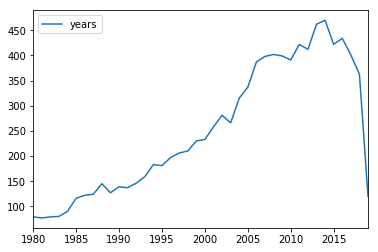

In [76]:
years_pd2 = pd.DataFrame(years_modern)


years_pd2['count'] = 1

years_pd2['years'] = years_pd2[0]


taelny = years_pd2['years'].value_counts()

taelnyny = pd.DataFrame(taelny)

taelnyny.sort_index().plot()

In [77]:
taelnyny.sort_index()

,years
1980,79
1981,77
1982,79
1983,80
1984,90
1985,116
1986,122
1987,124
1988,145
1989,127
